In [1]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import glob

from pathlib import Path

import scipy.stats as stats

from scipy import stats

import ruptures as rpt

In [2]:
# get the difference values for rcp45hotter_ssp5 and rcp45cooler_ssp5
def rcp45hotter_rcp45cooler_diff(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp5', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column, cold T2 column, and T2 difference column to hot_year_df
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        
        # convert to F
        hot_year_df['Hot_F'] = 1.8 * (hot_year_df['T2'] - 273) + 32
        hot_year_df['Cold_F'] = 1.8 * (hot_year_df['Cold_T2'] - 273) + 32
        hot_year_df['T2_Diff'] = hot_year_df['Hot_F'] - hot_year_df['Cold_F']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_diff_means.append(month_df['T2_Diff'].mean())
            
        if len(list_diff_means) == 960:
            break
            
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_diff_means, columns = ['Mean_Difference'])
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', 'Mean_Difference']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [3]:
def rcp85hotter_rcp85cooler_diff(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp5', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column, cold T2 column, and T2 difference column to hot_year_df
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        
        # convert to F
        hot_year_df['Hot_F'] = 1.8 * (hot_year_df['T2'] - 273) + 32
        hot_year_df['Cold_F'] = 1.8 * (hot_year_df['Cold_T2'] - 273) + 32
        hot_year_df['T2_Diff'] = hot_year_df['Hot_F'] - hot_year_df['Cold_F']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_diff_means.append(month_df['T2_Diff'].mean())
            
        if len(list_diff_means) == 960:
            break
            
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_diff_means, columns = ['Mean_Difference'])
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', 'Mean_Difference']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [4]:
def rcp85hotter_rcp45hotter_diff(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp5', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column, cold T2 column, and T2 difference column to hot_year_df
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        
        # convert to F
        hot_year_df['Hot_F'] = 1.8 * (hot_year_df['T2'] - 273) + 32
        hot_year_df['Cold_F'] = 1.8 * (hot_year_df['Cold_T2'] - 273) + 32
        hot_year_df['T2_Diff'] = hot_year_df['Hot_F'] - hot_year_df['Cold_F']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_diff_means.append(month_df['T2_Diff'].mean())
            
        if len(list_diff_means) == 960:
            break
            
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_diff_means, columns = ['Mean_Difference'])
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', 'Mean_Difference']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [5]:
def rcp85hotter_rcp45cooler_diff(input_BA): # do input_BA as string e.g. 'AEC'

    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp5', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column, cold T2 column, and T2 difference column to hot_year_df
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        
        # convert to F
        hot_year_df['Hot_F'] = 1.8 * (hot_year_df['T2'] - 273) + 32
        hot_year_df['Cold_F'] = 1.8 * (hot_year_df['Cold_T2'] - 273) + 32
        hot_year_df['T2_Diff'] = hot_year_df['Hot_F'] - hot_year_df['Cold_F']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_diff_means.append(month_df['T2_Diff'].mean())
            
        if len(list_diff_means) == 960:
            break
            
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_diff_means, columns = ['Mean_Difference'])
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', 'Mean_Difference']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [6]:
def rcp85cooler_rcp45hotter_diff(input_BA): # do input_BA as string e.g. 'AEC'
    # input hotter and colder_scenario as raw strings e.g. r'C:\projects\rcp45hotter_ssp3'
    
    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp5', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column, cold T2 column, and T2 difference column to hot_year_df
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        
        # convert to F
        hot_year_df['Hot_F'] = 1.8 * (hot_year_df['T2'] - 273) + 32
        hot_year_df['Cold_F'] = 1.8 * (hot_year_df['Cold_T2'] - 273) + 32
        hot_year_df['T2_Diff'] = hot_year_df['Hot_F'] - hot_year_df['Cold_F']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_diff_means.append(month_df['T2_Diff'].mean())
            
        if len(list_diff_means) == 960:
            break
            
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_diff_means, columns = ['Mean_Difference'])
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', 'Mean_Difference']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [7]:
def rcp85cooler_rcp45cooler_diff(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp5', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column, cold T2 column, and T2 difference column to hot_year_df
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        
        # convert to F
        hot_year_df['Hot_F'] = 1.8 * (hot_year_df['T2'] - 273) + 32
        hot_year_df['Cold_F'] = 1.8 * (hot_year_df['Cold_T2'] - 273) + 32
        hot_year_df['T2_Diff'] = hot_year_df['Hot_F'] - hot_year_df['Cold_F']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_diff_means.append(month_df['T2_Diff'].mean())
            
        if len(list_diff_means) == 960:
            break
            
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_diff_means, columns = ['Mean_Difference'])
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', 'Mean_Difference']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [8]:
def ssp5_pairs(input_BA): # give input_BA as a string e.g. 'AEC'
    
    # run all 6 functions to get 6 dataframes
    ssp5_pairs_df = rcp45hotter_rcp45cooler_diff(input_BA)
    rcp85hotter_rcp85cooler_df = rcp85hotter_rcp85cooler_diff(input_BA)
    rcp85hotter_rcp45hotter_df = rcp85hotter_rcp45hotter_diff(input_BA)
    rcp85hotter_rcp45cooler_df = rcp85hotter_rcp45cooler_diff(input_BA)
    rcp85cooler_rcp45hotter_df = rcp85cooler_rcp45hotter_diff(input_BA)
    rcp85cooler_rcp45cooler_df = rcp85cooler_rcp45cooler_diff(input_BA)
    
    # add all difference values to a single dataframe
    ssp5_pairs_df['rcp85hotter_rcp85cooler'] = rcp85hotter_rcp85cooler_df['Mean_Difference']
    ssp5_pairs_df['rcp85hotter_rcp45hotter'] = rcp85hotter_rcp45hotter_df['Mean_Difference']
    ssp5_pairs_df['rcp85hotter_rcp45cooler'] = rcp85hotter_rcp45cooler_df['Mean_Difference']
    ssp5_pairs_df['rcp85cooler_rcp45hotter'] = rcp85cooler_rcp45hotter_df['Mean_Difference']
    ssp5_pairs_df['rcp85cooler_rcp45cooler'] = rcp85cooler_rcp45cooler_df['Mean_Difference']
    
    # rename the first column of differences to match the rest
    ssp5_pairs_df = ssp5_pairs_df.rename(columns = {'Mean_Difference': 'rcp45hotter_rcp45cooler'})
    
    return ssp5_pairs_df

In [9]:
# create lists of the indices of each breakpoint for the 6 different pairings
def pelt_6_results(input_BA, input_pen): # do input_BA as a string e.g. 'AEC', do input_pen as an integer
    
    # call ssp5_pairs to generate the difference values for each of the 6 plots
    big_ssp5_df = ssp5_pairs(input_BA)
    
    # big_ssp5_df['Date'] = pd.to_datetime(big_ssp5_df['Index'])
    # big_ssp5_df.set_index(big_ssp5_df['Date'], inplace = True)
    
    # create an array of each of the difference pairings, then convert to list
    ts_1 = big_ssp5_df['rcp45hotter_rcp45cooler']
    rcp45hotter_rcp45cooler = np.array(ts_1.tolist())
    
    ts_2 = big_ssp5_df['rcp85hotter_rcp85cooler']
    rcp85hotter_rcp85cooler = np.array(ts_2.tolist())
    
    ts_3 = big_ssp5_df['rcp85hotter_rcp45hotter']
    rcp85hotter_rcp45hotter = np.array(ts_3.tolist())
    
    ts_4 = big_ssp5_df['rcp85hotter_rcp45cooler']
    rcp85hotter_rcp45cooler = np.array(ts_4.tolist())
    
    ts_5 = big_ssp5_df['rcp85cooler_rcp45hotter']
    rcp85cooler_rcp45hotter = np.array(ts_5.tolist())
    
    ts_6 = big_ssp5_df['rcp85cooler_rcp45cooler']
    rcp85cooler_rcp45cooler = np.array(ts_6.tolist())
    
    # set model, use algorithm to predict breakpoints within each time series
    model="l1"
    algo_1 = rpt.Pelt(model = model).fit(rcp45hotter_rcp45cooler)
    result_1 = algo_1.predict(pen = input_pen)
    
    algo_2 = rpt.Pelt(model = model).fit(rcp85hotter_rcp85cooler)
    result_2 = algo_2.predict(pen = input_pen)
    
    algo_3 = rpt.Pelt(model = model).fit(rcp85hotter_rcp45hotter)
    result_3 = algo_3.predict(pen = input_pen)
    
    algo_4 = rpt.Pelt(model = model).fit(rcp85hotter_rcp45cooler)
    result_4 = algo_4.predict(pen = input_pen)
    
    algo_5 = rpt.Pelt(model = model).fit(rcp85cooler_rcp45hotter)
    result_5 = algo_5.predict(pen = input_pen)
    
    algo_6 = rpt.Pelt(model = model).fit(rcp85cooler_rcp45cooler)
    result_6 = algo_6.predict(pen = input_pen)
    
    # return the 6 results, which are lists of the indices for the breakpoints
    return result_1, result_2, result_3, result_4, result_5, result_6, ts_1, ts_2, ts_3, ts_4, ts_5, ts_6
    # return big_ssp5_df

In [42]:
# create a 3x2 plot of the changepoints detected
def pelt_6_plots(input_BA, input_pen):
    
    # run the pelt_6_results function
    result_1, result_2, result_3, result_4, result_5, result_6, ts_1, ts_2, ts_3, ts_4, ts_5, ts_6 = pelt_6_results(input_BA, input_pen)

    plt.figure(figsize=(20, 16))
    plt.rcParams['font.size'] = 10
    
    # create 6 plots
    plt.subplot(321)
    plt.plot(ts_1)
    # avoid plotting final changepoint
    for index in result_1:
        plt.axvline(x = index, color = 'red', linestyle = 'dashed')
        if index == result_1[-2]:
            break
    # add plot information and formatting
    plt.xlabel('Year')
    plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], ['2020', '2030', '2040','2050', '2060', '2070','2080', '2090', '2100'])
    plt.ylabel('T2 (F)')
    plt.ylim(-2, 10.5)
    plt.title('rcp45hotter_ssp5 - rcp45cooler_ssp5 ' + input_BA + ' Pen = ' + str(input_pen))
        
    plt.subplot(322)
    plt.plot(ts_2)
    for index in result_2:
        plt.axvline(x = index, color = 'red', linestyle = 'dashed')
        if index == result_2[-2]:
            break
    plt.xlabel('Year')
    plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], ['2020', '2030', '2040','2050', '2060', '2070','2080', '2090', '2100'])
    plt.ylabel('T2 (F)')
    plt.ylim(-2, 10.5)
    plt.title('rcp85hotter_ssp5 - rcp85cooler_ssp5 ' + input_BA + ' Pen = ' + str(input_pen))
        
    plt.subplot(323)
    plt.plot(ts_3)
    for index in result_3:
        plt.axvline(x = index, color = 'red', linestyle = 'dashed')
        if index == result_3[-2]:
            break
    plt.xlabel('Year')
    plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], ['2020', '2030', '2040','2050', '2060', '2070','2080', '2090', '2100'])
    plt.ylabel('T2 (F)')
    plt.ylim(-2, 10.5)
    plt.title('rcp85hotter_ssp5 - rcp45hotter_ssp5 ' + input_BA + ' Pen = ' + str(input_pen))
        
    plt.subplot(324)
    plt.plot(ts_4)
    for index in result_4:
        plt.axvline(x = index, color = 'red', linestyle = 'dashed')
        if index == result_4[-2]:
            break
    plt.xlabel('Year')
    plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], ['2020', '2030', '2040','2050', '2060', '2070','2080', '2090', '2100'])
    plt.ylabel('T2 (F)')
    plt.ylim(-2, 10.5)
    plt.title('rcp85hotter_ssp5 - rcp45cooler_ssp5 ' + input_BA + ' Pen = ' + str(input_pen))
        
    plt.subplot(325)
    plt.plot(ts_5)
    for index in result_5:
        plt.axvline(x = index, color = 'red', linestyle = 'dashed')
        if index == result_5[-2]:
            break
    plt.xlabel('Year')
    plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], ['2020', '2030', '2040','2050', '2060', '2070','2080', '2090', '2100'])
    plt.ylabel('T2 (F)')
    plt.ylim(-2, 10.5)
    plt.title('rcp85cooler_ssp5 - rcp45hotter_ssp5 ' + input_BA + ' Pen = ' + str(input_pen))
        
    plt.subplot(326)
    plt.plot(ts_6)
    for index in result_6:
        plt.axvline(x = index, color = 'red', linestyle = 'dashed')
        if index == result_6[-2]:
            break
    plt.xlabel('Year')
    plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], ['2020', '2030', '2040','2050', '2060', '2070','2080', '2090', '2100'])
    plt.ylabel('T2 (F)')
    plt.ylim(-2, 10.5)
    plt.title('rcp85cooler_ssp5 - rcp45cooler_ssp5 ' + input_BA + ' Pen = ' + str(input_pen))
    
    # add overall title
    plt.suptitle('PELT Changepoints for T2 Differences of ' + input_BA + ' with pen = ' + str(input_pen), y = 0.92)
        
    # save figure and show
    plt.savefig('sixsubplot_' + input_BA + '_pen_' + str(input_pen) + '.png', bbox_inches = "tight", dpi = 100)
    plt.show()
    
    # change line colors between plots
    # remove redundant information of BA and pen
    # remove empty parts of x-axis
    
    return

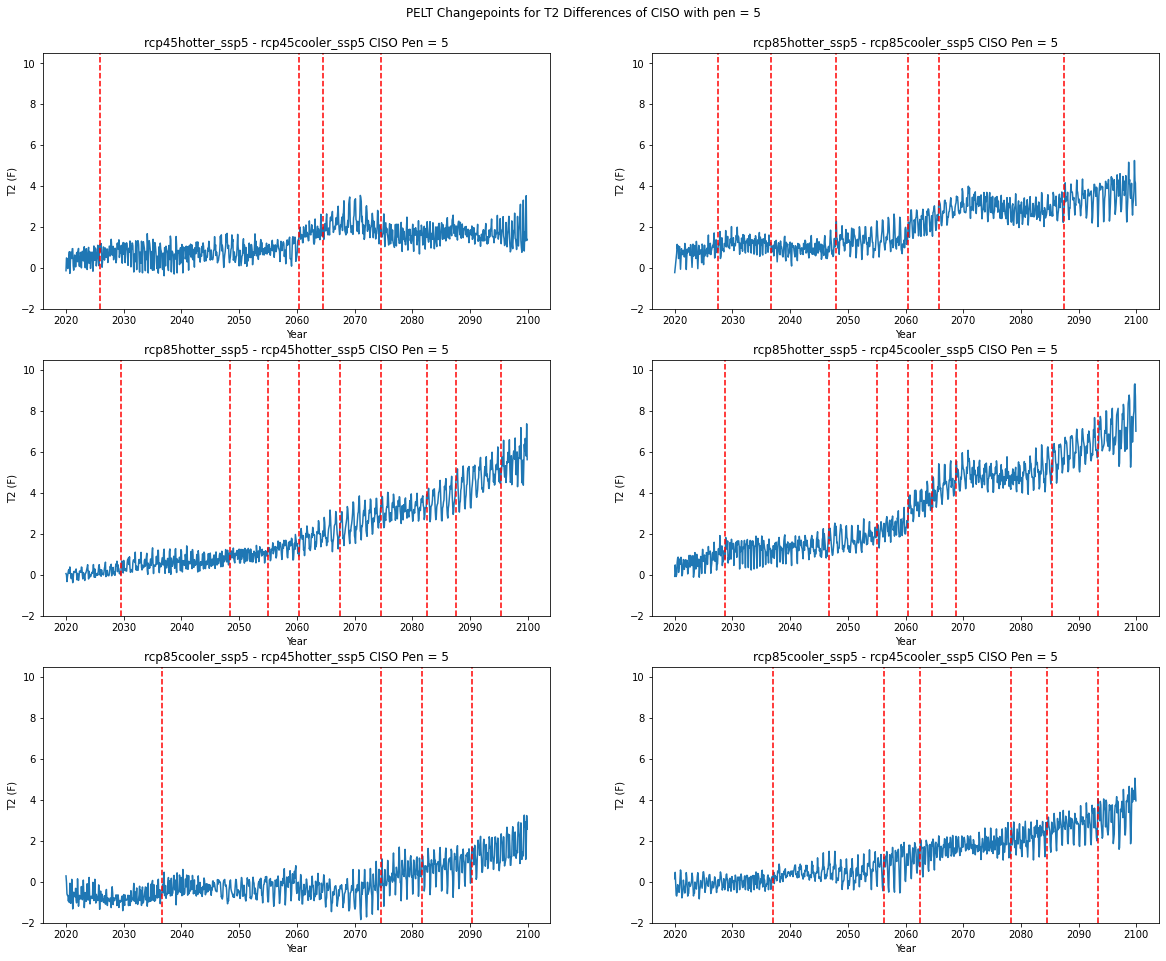

In [43]:
pelt_6_plots('CISO', 5)